# Project $\Upsilon$

The goal of Project $\Upsilon$ (and of this notebook in particular) is to learn about the statistical properties of the simple continued-fraction expansion of fundamental mathematical constants of nature.

Any real number $r$ can be expressed a simple continued fraction, which takes the general form 
$r=a_{0}+\frac{1}{a_{1}+\frac{1}{a_{2}+\frac{1}{a_{3}+\frac{1}{a_{4}+\cdots}}}}$.
Here, the series $A = \{a_{0}; a_{1}, a_{2}, a_{3}, a_{4}, \cdots$ contains the _digits_ of the simple continued-fraction expansion of $r$, all of which are natural numbers in the **simple** continued fraction expansion.
($a_{0}$, the whole-number part of $r$ is followed by a semicolon because it is only debatably part of a number's canonical continued-fraction expansion.
We exclude it from the fitting procedure everywhere in this library.)

$A$ is finite for rational numbers but infinite for irrational numbers.
A subset of the irrational numbers--roots with degree greater than 2, logarithms, and transcendental constants--have especially interesting non-periodic, _seemingly_ random continued-fraction expansions.
It is on this latter group that we focus in the Upsilon library
In particular we concentrate on mathematical constants that crop up in physics since these are in some sense fundamental constants of our universe, having applications beyond pure mathematics without being a physical constant such as the speed of light whose value is dependent on the system of units used to describe it and not numerically determined.

Our goal is to learn just how regular the seemingly random digits of these constants' simple continued-fraction expansions really are.
Currently, we conduct a rigorous fitting procedure and draw conclusions only about the circle constant $\pi$ ("pi") and the Euler-Mascheroni constant $\gamma$ ("gamma").
Information on these constants' simple continued-fraction expansions can be found at [A001203](https://oeis.org/A001203) and [A002852](https://oeis.org/A002852), respectively.
In due course we aim to apply the same mode of analysis to other important constants like these two, such as Apery's constant $\zeta(3)$ ("apery") and $\log(2)$ (both of which are implemented for a very limited data set) as well as Catalan's constant $G$ ("catalan"), and Feigenbaum's constants $\alpha$ and $\delta$ ("alpha" and "delta"), eventually once enough data is available.

## Acknowledgments
I would like to acknowledge the following people for their aid to this project.
- Syed Fahad, who generated billions of digits in these constants' expansion. His results for $\pi$ are found [here](https://drive.google.com/drive/folders/1--Qh9Xxq1i6oeHnTXzKrQ9FoguHreBKy) and for $\gamma$ [here](https://drive.google.com/drive/folders/15LjUnGcZiDAJLptqwl_Wf69zFLV0HkIK).
- Matt Rendina, who has demonstrated a patience in helping me to get my code to work on Ohio State University's Unity cluster that is nothing short of saintly, and whose insights and advice made this project possible.
- Joey Houser, whose friendship and perspective buoyed my spirits and encouraged me to finish this project.

#### Import statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import time
%matplotlib inline

In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

## Fitting on a simple example
Currently, we have the first 25,000 digits each of Apery's constant ($\zeta(3)$; see [A013631](https://oeis.org/A013631)) and $\log(2)$ (see [A016730](https://oeis.org/A016730)).
We can use the former as a test case with a small amount of data to demonstrate the overall power-law-like behavior of these fundamental constants' simple continued-fraction expansions.

In [2]:
data_cluster = np.loadtxt("contfract_idx_log2.txt", skiprows = 1, usecols = (1))

In [3]:
hist, bins = np.histogram(data_cluster, bins = int(np.max(data_cluster)) - 1)

#### Scatter plot of histogram bin maxima

(0.1, 16608)

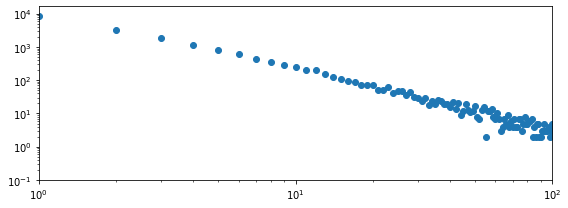

In [4]:
fig, ax = plt.subplots(1, 1, tight_layout=True, figsize=(8, 3))
ax.scatter(bins[:-1], hist)
ax.semilogx()
ax.semilogy()
# ax.set_yscale('log')
# plt.yscale('log')
ax.set_xlim(1, 100)
ax.set_ylim(0.1, 2 * max(hist))

#### Function for fitting
The linear log-log behavior in the plot above suggests that the histogram can be described accurately by a power law of the form

$p(x) = P x^{-\Upsilon}$, 

where $p(x)$ is the relative probability of finding some integer $x$ in the continued-fraction expansion, $P$ is a constant for the magnitude of the power law, and $\Upsilon$ is the power law's exponent.
It is from this this exponent that this project gets its name.
I chose $\Upsilon$ above all the other options because I think it's a very comely letter that is badly underused in math and physics; and if I ever get the opportunity to name another numerical quantity, you had better believe it's going to be capital xi, $\Xi$.

In [5]:
def func_power(x, P, t):
    return P * x**(-t)

#### Fits to the power law

In [6]:
popt_linear, pcov_linear = curve_fit(func_power, bins[:-1], hist)
print(popt_linear)
print(np.sqrt(np.diag(pcov_linear)))
ax.plot(bins, func_power(bins, *popt_linear))
ax.set_ylim([10**(0), 10**(5)])
fig.figure

[8.3862162e+03 1.4364816e+00]
[4.17975659e-01 1.01910031e-04]


## Scaling the power law to larger data sets
Now that we have seen some evidence that a power law well describes the distribution of digits in a continued-fraction expansion for a transcendental constant that appears in nature, it is natural to broaden our inquiry to other constants.
In our case, billions of digits in these expansions are available online for $\pi$ and $\gamma$ split into large files of about on gigabyte each called "iterations."
Our plan of attack is simple: for each iteration, fit its digits to a power law and extract the exponent (which is accomplished by `scripts/histogram_fit.py`, and then histogram the results to see if there is common behavior across constants.

#### Extracts the exponents and their error from files generated by `histogram_fit.py`

In [7]:
pi_Ups = []
pi_Ups_var = []
gamma_Ups = []
gamma_Ups_var = []
apery_Ups = 1.43101328
log2_Ups = 1.4364816
vertline_Ups = [apery_Ups, log2_Ups]

for i in range(1, 93):
    try:
        if i < 10:
            file = open("pi_fit_it0" + str(i) + ".txt")
        else:
            file = open("pi_fit_it" + str(i) + ".txt")
        
        [Ups, var] = list(map(np.float64, file.read().splitlines()))
        pi_Ups.append(Ups)
        pi_Ups_var.append(var)
        file.close()
    except:
        pass

for i in range(1, 42):
    try:
        if i < 10:
            file = open("gamma_fit_it0" + str(i) + ".txt")
        else:
            file = open("gamma_fit_it" + str(i) + ".txt")
        
        [Ups, var] = list(map(np.float64, file.read().splitlines()))
        gamma_Ups.append(Ups)
        gamma_Ups_var.append(var)
        file.close()
    except:
        pass

#### Histograms the extracted values for the power-law exponent $\Upsilon$ by constant and plots their mean and mean squared error

pi mean: 1.43174
pi mean standard error: 1.076888309965307e-05
gamma mean: 1.43174
gamma mean standard error: 1.4075458234792594e-05


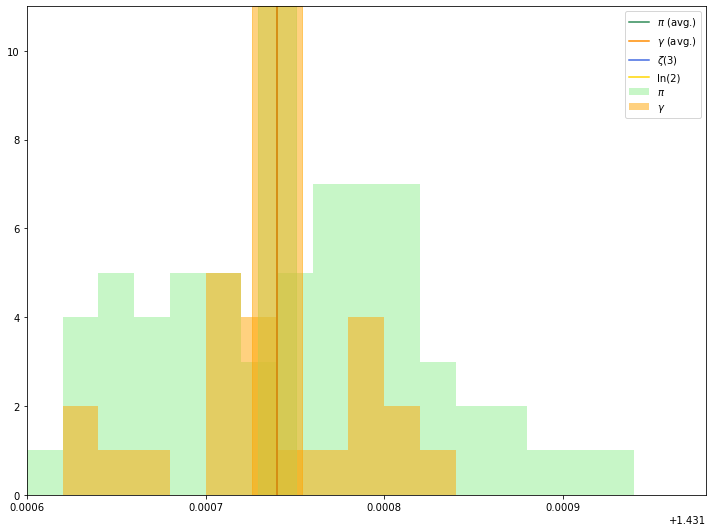

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 7.5))

constants_list = ["pi", "gamma"]
hist_labels_dict = {"pi" : r'$\pi$', "gamma" : r'$\gamma$'}
hist_colors_dict = {"pi" : "lightgreen", "gamma" : "orange",
                   "apery" : "lightskyblue", "log2" : "yellow"}
vertline_list = ["apery", "log2"]
vertline_vals_dict = {"apery" : 1.43101328, "log2" : 1.4364816}
vertline_mse_dict = {"apery" : 2.66965761e-04, "log2" : 1.01910031e-04}
vertline_labels_dict = {"apery" : r'$\zeta(3)$', "log2" : r'ln(2)', 
                       "pi" : r'$\pi$ (avg.)', "gamma" : r'$\gamma$ (avg.)'}
vertline_colors_dict = {"apery" : "royalblue", "log2" : "gold", 
                       "pi" : "seagreen", "gamma" : "darkorange"}

hist_bins = np.arange(1.43160, 1.432, 0.00002)

hist_data = []
hist_data.append(pi_Ups)
hist_data.append(gamma_Ups)
hist_data_error = []
hist_data_error.append(pi_Ups_var)
hist_data_error.append(gamma_Ups_var)

all_data = []
all_data_error = []
for (l, l_err) in zip(hist_data, hist_data_error):
    all_data.extend(l)
    all_data_error.extend(l_err)

for (const, dat, err) in zip(constants_list, hist_data, hist_data_error):
    axes.hist(dat, 
            hist_bins, 
            histtype='bar', 
            stacked=False, 
            label = hist_labels_dict[const], 
            color = hist_colors_dict[const], 
            alpha = 0.5)
    
    mean = np.around(np.average(dat, weights = np.array(err)**(-2)), 
                     decimals = 5)
    print(const + " mean: " + str(mean))
    vertline_vals_dict[const] = mean
    
    mse = np.std(dat, ddof=1) / np.sqrt(len(dat))
    print(const + " mean standard error: " + str(mse))
    vertline_mse_dict[const] = mse

for l in constants_list + vertline_list:
    axes.axvspan(vertline_vals_dict[l] - vertline_mse_dict[l], 
                vertline_vals_dict[l] + vertline_mse_dict[l], 
                color = hist_colors_dict[l], 
                alpha = 0.5)
    axes.axvline(vertline_vals_dict[l],
                 label = vertline_labels_dict[l], 
                 color = vertline_colors_dict[l])

axes.set_xticks(np.arange(1.431, 1.432, 0.0001))
axes.set_xlim(np.min(hist_bins), np.max(hist_bins))
axes.set_ylim(0, 11)

axes.legend()

fig.tight_layout()
plt.show()

#### Using all available histogrammed data, we arrive at our best-fit value for $\Upsilon$ accompanied by error bars

In [9]:
Upsilon = np.around(np.average(all_data,
                        weights = (np.array(all_data_error))**(-2)),     
        decimals = 6
        )
Upsilon_mse = np.std(all_data, ddof=1) / np.sqrt(len(all_data))
print("Upsilon = " + str(Upsilon) + " +/- " + str(Upsilon_mse))

Upsilon = 1.431737 +/- 8.759400944538879e-06


And there you have it: $\Upsilon = 1.431737 \pm 0.000008$.

Of course we'll do what we can to refine that answer, but for now that will suffice to start generating our own constants in `constant_generator.ipynb`.